#Extracción del Archivo Tratado

In [38]:
import pandas as pd

In [39]:
#cargamos los datos
url = ('/content/drive/MyDrive/curso alura/datos_telecomx.csv')
df = pd.read_csv(url)

In [40]:
#desplegamos las 5 primeras filas
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Eliminación de Columnas Irrelevantes

In [41]:
#revisamos las columnas que tiene el DaraFrame
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [42]:
#eliminamos la columna que no nos proporciona info relevante
df.drop(['customerID'], axis=1, inplace=True)

In [43]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Encoding

In [44]:
# Quitamos espacios en 'Churn' y convertirlo si aún está en texto
df['Churn'] = df['Churn'].astype(str).str.strip()

# Mapeamos
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Eliminamos filas con valores nulos en 'Churn'
df = df.dropna(subset=['Churn'])

# Convertir a int
df['Churn'] = df['Churn'].astype(int)

# Confirmar valores únicos
print(df['Churn'].unique())


[0 1]


/tmp/ipython-input-44-904960915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(int)


In [45]:
#Identificamos columnas categóricas para hacer encoding
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

In [46]:
#Aplicar One-Hot Encoding
#'drop_first=True' elimina una categoría para evitar multicolinealidad
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Convertir columnas booleanas a enteros
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

##Verificación de la Proporción de Cancelación (Churn)

In [47]:
# Verificamos cuántos clientes cancelaron y cuántos no
churn_counts = df_encoded['Churn'].value_counts()
print("Distribución de Churn (0 = No canceló, 1 = Canceló):\n", churn_counts)

# Calcular proporciones
churn_proportions = df_encoded['Churn'].value_counts(normalize=True)
print("\nProporción de cada clase:\n", churn_proportions)

# Mostrarlo en porcentaje
print("\nProporción en %:")
print((churn_proportions * 100).round(2).astype(str) + '%')


Distribución de Churn (0 = No canceló, 1 = Canceló):
 Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción de cada clase:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Proporción en %:
Churn
0    73.46%
1    26.54%
Name: proportion, dtype: object


##Balanceo de Clases

###Realizaremos el balanceo de clases ya que el desbalance es moderado la mejor opción es usar el oversampling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter

# --- 1. Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# --- 2. Dividir en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Imputar valores faltantes en X_train (con media)
imputer = SimpleImputer(strategy='mean')  # Puedes cambiar a 'median' si prefieres
X_train_imputed = imputer.fit_transform(X_train)

# --- 4. Reconstruir DataFrame (porque fit_transform devuelve array)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# --- 5. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- 6. Verificar balance de clases
print("Distribución antes del SMOTE:", Counter(y_train))
print("Distribución después del SMOTE:", Counter(y_train_resampled))


Distribución antes del SMOTE: Counter({0: 3622, 1: 1308})
Distribución después del SMOTE: Counter({0: 3622, 1: 3622})


##Normalización o Estandarización

In [50]:
from sklearn.preprocessing import StandardScaler

# Inicializar escalador
scaler = StandardScaler()

# Ajustar y transformar SOLO X_train_resampled
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transformar X_test con el mismo escalador
X_test_scaled = scaler.transform(X_test)


#Correlación y Selección de Variables

##Análisis de Correlación

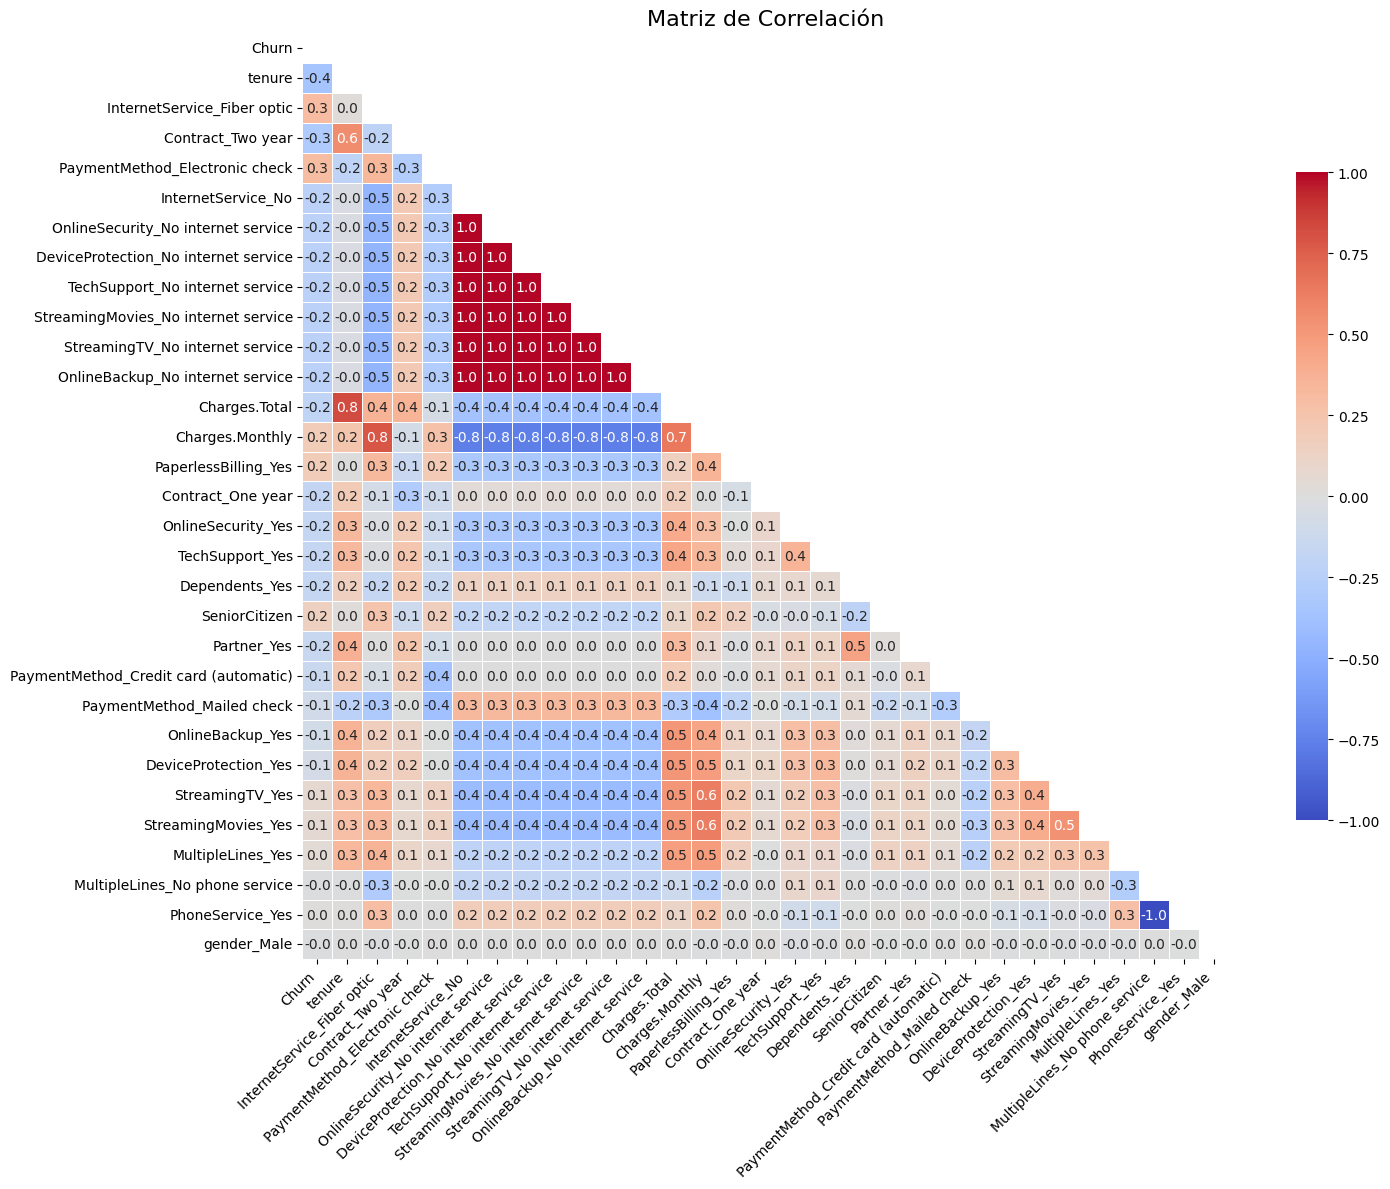

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación solo con columnas numéricas
corr_matrix = df_encoded.corr(numeric_only=True)

# --- (Opcional) Ordenar las columnas por su correlación con Churn
corr_matrix = corr_matrix.loc[
    corr_matrix['Churn'].abs().sort_values(ascending=False).index,
    corr_matrix['Churn'].abs().sort_values(ascending=False).index
]

# --- (Opcional) Crear una máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# --- Crear el heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
